In [109]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [56]:
df_wholesale = pd.read_csv("Wholesale Customer.csv")
df_wholesale.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [57]:
df_wholesale.shape

(440, 9)

In [58]:
df_wholesale.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


From the above data it is clear that Top channel  purchasing items is Hotels. On an avarage most of the expendature has been done on Fresh Product(i.e : 12000.297727) 


<AxesSubplot:>

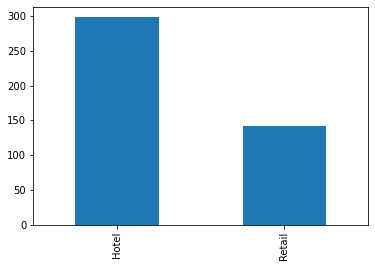

In [59]:
df_wholesale["Channel"].value_counts(sort= False ).plot(kind="bar")

From the bar graph we can say that Most of the HOTELS are spending omney on maintain their stock of different items in different different region.

From above graph it is clear that Channel 'Hotel' have purchased Most and Channel 'Retail' have purchased least product from the wholesale distributor 

<AxesSubplot:>

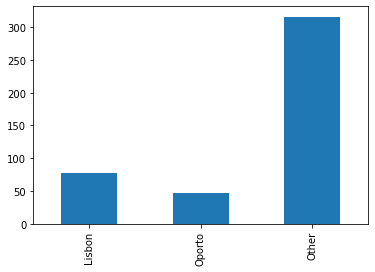

In [60]:
df_wholesale["Region"].value_counts(sort= False ).plot(kind="bar")


Items has got purchased by Other Region is much more greater than rest of the two region.

In [61]:
df_grp_region = df_wholesale.groupby("Region").sum()
df_grp_region.describe()


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000,3.000000,3.000000
mean,32340.000000,1.760044e+06,8.501190e+05,1.166187e+06,450550.000000,422619.000000,223647.666667
std,27487.370755,1.915674e+06,9.041462e+05,1.153032e+06,416144.593059,405411.963214,251054.618210
min,14899.000000,4.647210e+05,2.391440e+05,4.332740e+05,190132.000000,173311.000000,54506.000000
25%,16497.000000,6.597770e+05,3.307990e+05,5.016555e+05,210579.000000,188723.500000,79416.500000
50%,18095.000000,8.548330e+05,4.224540e+05,5.700370e+05,231026.000000,204136.000000,104327.000000
75%,41060.500000,2.407705e+06,1.155606e+06,1.532644e+06,580759.000000,547273.000000,308218.500000
max,64026.000000,3.960577e+06,1.888759e+06,2.495251e+06,930492.000000,890410.000000,512110.000000


In [62]:
df_grp_Channel = df_wholesale.groupby("Channel").sum()
df_grp_Channel.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000
mean,48510.000000,2.640066e+06,1.275178e+06,1.749281e+06,6.758250e+05,6.339285e+05,335471.500000
std,31853.746279,1.945465e+06,3.486949e+05,8.040709e+05,6.238860e+05,5.633400e+05,122306.138621
min,25986.000000,1.264414e+06,1.028614e+06,1.180717e+06,2.346710e+05,2.355870e+05,248988.000000
25%,37248.000000,1.952240e+06,1.151896e+06,1.464999e+06,4.552480e+05,4.347578e+05,292229.750000
50%,48510.000000,2.640066e+06,1.275178e+06,1.749281e+06,6.758250e+05,6.339285e+05,335471.500000
75%,59772.000000,3.327891e+06,1.398461e+06,2.033563e+06,8.964020e+05,8.330992e+05,378713.250000
max,71034.000000,4.015717e+06,1.521743e+06,2.317845e+06,1.116979e+06,1.032270e+06,421955.000000


<AxesSubplot:xlabel='Region', ylabel='Fresh'>

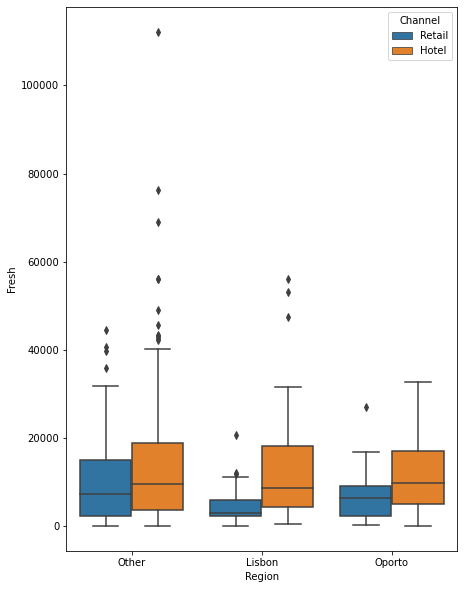

In [63]:
plt.figure(figsize=(7,10))
sns.boxplot(x="Region", y="Fresh",hue="Channel", data = df_wholesale)

<AxesSubplot:xlabel='Region', ylabel='Milk'>

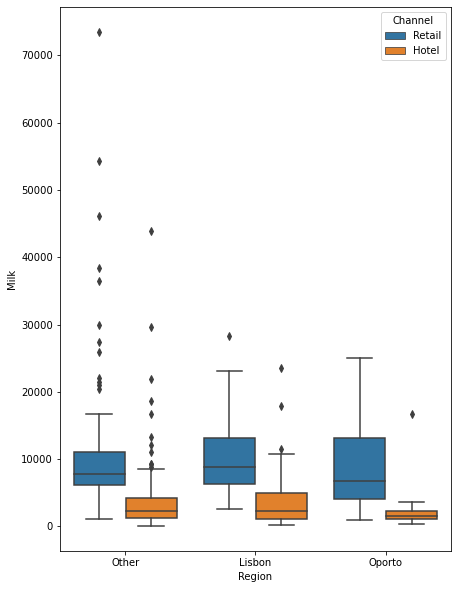

In [64]:
plt.figure(figsize=(7,10))
sns.boxplot(x="Region", y="Milk",hue="Channel", data = df_wholesale)

<AxesSubplot:xlabel='Region', ylabel='Grocery'>

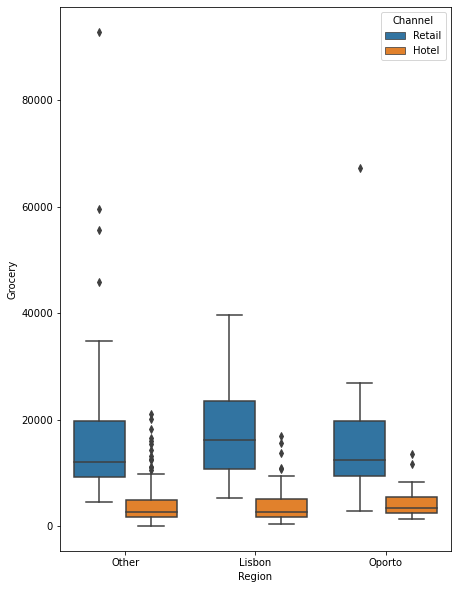

In [65]:
plt.figure(figsize=(7,10))
sns.boxplot(x="Region", y="Grocery",hue="Channel", data = df_wholesale)

<AxesSubplot:xlabel='Region', ylabel='Frozen'>

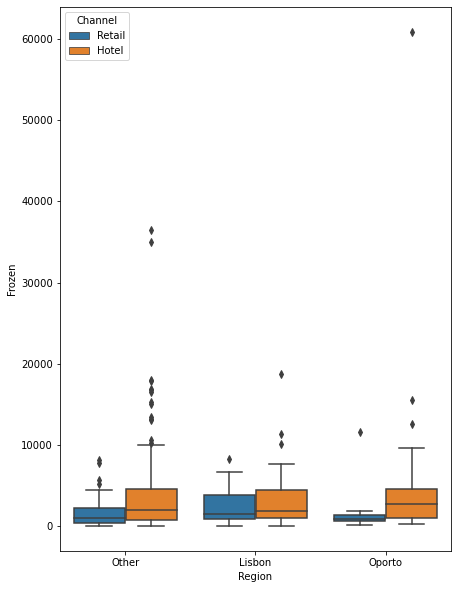

In [66]:
plt.figure(figsize=(7,10))
sns.boxplot(x="Region", y="Frozen",hue="Channel", data = df_wholesale)

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

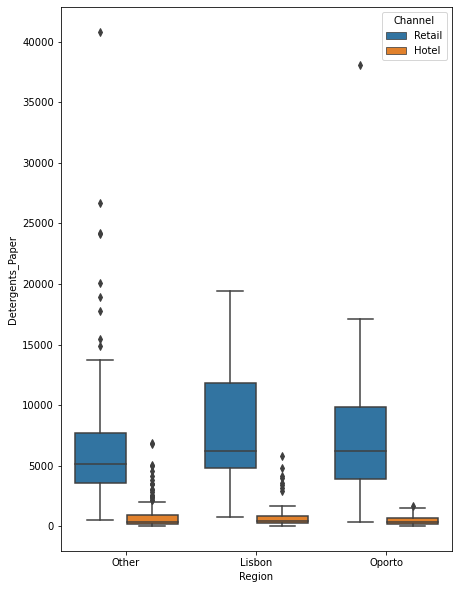

In [67]:
plt.figure(figsize=(7,10))
sns.boxplot(x="Region", y="Detergents_Paper",hue="Channel", data = df_wholesale)

<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

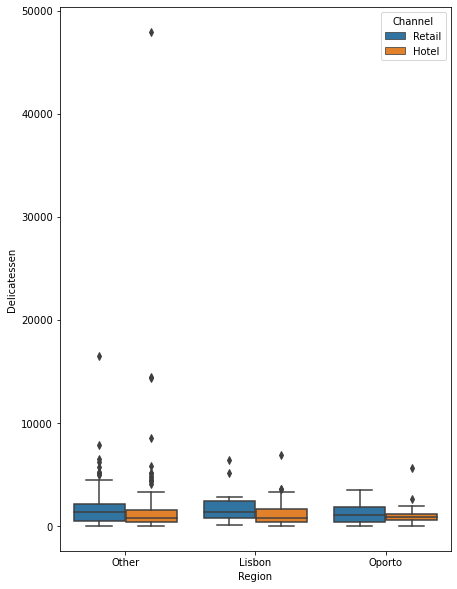

In [68]:
plt.figure(figsize=(7,10))
sns.boxplot(x="Region", y="Delicatessen",hue="Channel", data = df_wholesale)

In [69]:

from scipy.stats import variation 
variation(df_wholesale["Fresh"], axis = 0)

1.0527196084948243

In [70]:
variation(df_wholesale["Milk"], axis = 0)

1.27185083074245

In [71]:
variation(df_wholesale["Grocery"], axis = 0)

1.1938154477492668

In [72]:
variation(df_wholesale["Frozen"], axis = 0)

1.578535529860776

In [73]:
variation(df_wholesale["Detergents_Paper"], axis = 0)

1.6527657881041735

In [74]:
variation(df_wholesale["Delicatessen"], axis = 0)

1.8473041039189302

In [75]:
cor_Wholesale = df_wholesale.corr()

<AxesSubplot:>

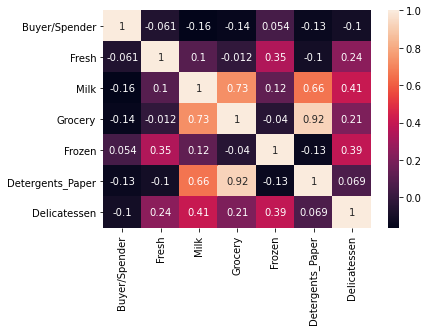

In [76]:
sns.heatmap(cor_Wholesale,annot=True)

In [77]:
# Grocery and Detegent_papers are highly related(0.92),Grocery and Milk are second highly related(0.73), Grocery and Milk are second highly related(0.73),Detergent_Paper and Milk are Third highly related(0.66)

In [78]:
df_Survey = pd.read_csv("Survey-1.csv")

In [79]:
df_Survey

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [80]:
ct_Majors = pd.crosstab(df_Survey["Gender"],df_Survey["Major"])
ct_Majors["Total"] = ct_Majors.sum(axis = 1)
ct_Majors

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29


In [81]:
pd.crosstab(df_Survey["Gender"],df_Survey["Grad Intention"])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [82]:
pd.crosstab(df_Survey["Gender"],df_Survey["Employment"])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [83]:
pd.crosstab(df_Survey["Gender"],df_Survey["Computer"])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2

In [84]:
df_Survey["Gender"].value_counts()



Female    33
Male      29
Name: Gender, dtype: int64

In [85]:
Pr_Male_outOf_all_Students = 29/62
Pr_Male_outOf_all_Students

0.46774193548387094

In [86]:
Pr_Female_outOf_all_Students= 33/62
Pr_Female_outOf_all_Students

0.532258064516129

# 2.3

In [87]:
Pr_Male_outOf_Major_Accounting = 4/29
print(Pr_Male_outOf_Major_Accounting)

0.13793103448275862


In [88]:
Pr_Male_outOf_Major_CIS = 1/29
print(Pr_Male_outOf_Major_CIS)

0.034482758620689655


In [89]:
Pr_Male_outOf_Major_EconomicsFinance = 4/29
print(Pr_Male_outOf_Major_EconomicsFinance)

0.13793103448275862


In [90]:
Pr_Male_outOf_Major_International_Business = 4/29
print(Pr_Male_outOf_Major_International_Business)

0.13793103448275862


In [91]:
Pr_Male_outOf_Major_Management = 6/29
print(Pr_Male_outOf_Major_Management)

0.20689655172413793


In [92]:
Pr_Male_outOf_Major_Other = 4/29
print(Pr_Male_outOf_Major_Other)

0.13793103448275862


In [93]:
Pr_Male_outOf_Major_Retailing_Marketing = 5/29
print(Pr_Male_outOf_Major_Retailing_Marketing)

0.1724137931034483


In [94]:
Pr_Male_outOf_Major_Undecided = 3/29
print(Pr_Male_outOf_Major_Undecided)

0.10344827586206896


In [95]:
Pr_Female_outOf_Major_Accounting = 3/29
print(Pr_Female_outOf_Major_Accounting)

0.10344827586206896


In [96]:
Pr_Female_outOf_Major_CIS = 3/29
print(Pr_Female_outOf_Major_CIS)

0.10344827586206896


In [97]:
Pr_Female_outOf_Major_EconomicsFinance = 7/29
print(Pr_Female_outOf_Major_EconomicsFinance)

0.2413793103448276


In [98]:
Pr_Female_outOf_Major_International_Business = 4/29
print(Pr_Female_outOf_Major_International_Business)

0.13793103448275862


In [99]:
Pr_Female_outOf_Major_Management = 4/29
print(Pr_Female_outOf_Major_Management)

0.13793103448275862


In [100]:
Pr_Female_outOf_Major_Other = 3/29
print(Pr_Female_outOf_Major_Other)

0.10344827586206896


In [101]:
Pr_Female_outOf_Major_Retailing_Marketing = 9/29
print(Pr_Female_outOf_Major_Retailing_Marketing)

0.3103448275862069


In [102]:
Pr_Female_outOf_Major_Undecided = 0/29
print(Pr_Female_outOf_Major_Undecided)

0.0


# 2.4

In [103]:
#2.4 a)
#no_of_male_inteded_to_grad=17
#total number of students = 62
Pr_Male_intend_Grad= 17/ 62
print(Pr_Male_intend_Grad)

0.27419354838709675


In [104]:
#2.4 b)
#no_of_female_dont have laptop = 4
#total number of students = 62
Pr_Female_intend_Grad= 4/ 62
print(Pr_Male_intend_Grad)

0.27419354838709675


# 2.5 

In [105]:
#P(M or E) = P(M) +P(E)- P(M/E)
Prob_Male_or_Full_time_emp = (33/62) + (10/62)- (7/62)
Prob_Male_or_Full_time_emp

0.5806451612903225

In [106]:
# Probabilty of female student will be majoring in international business or management.
# prb_female_Stud_IB_or_Manage = Pr_Female_outOf_Major_International_Business * Pr_Female_outOf_Major_Management
prb_female_Stud_IB_or_Manage = 0.138  + 0.138
print(prb_female_Stud_IB_or_Manage)

0.276


# 2.6

In [111]:
pd.crosstab(df_Survey["Gender"],df_Survey["Grad Intention"]).drop("Undecided",axis =1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [113]:
Prb_Female_outof_Intend_Grad  = 20/40
print("Prb_Female_outof_Intend_Grad ",Prb_Female_outof_Intend_Grad)
Prb_Yes_GradIntend = 18/ 40
print("Prb_Yes_GradIntend ",Prb_Yes_GradIntend)
Prb_female_Yes_intend_grad = 11/20
print("Prb_female_Yes_intend_grad ",Prb_female_Yes_intend_grad)


Prb_Female_outof_Intend_Grad  0.5
Prb_Yes_GradIntend  0.45
Prb_female_Yes_intend_grad  0.55


# as p(f)+ p(y) < p(y/f)
we can say that these two events are dependent

In [115]:
#2.7

# a)

In [120]:
Total_GPA_Less_than_Three = df_Survey[df_Survey["GPA"] < 3].count()
Total_GPA_Less_than_Three

ID                   17
Gender               17
Age                  17
Class                17
Major                17
Grad Intention       17
GPA                  17
Employment           17
Salary               17
Social Networking    17
Satisfaction         17
Spending             17
Computer             17
Text Messages        17
dtype: int64

In [ ]:
pro_Student_GPA_Less_than_Three = 17/62
print("pro_Student_GPA_Less_than_Three ",pro_Student_GPA_Less_than_Three )

b)

In [152]:
Prob_Male = 29/62
NumberOf_Male_Salary_Greater_than_50 = df_Survey[(df_Survey["Salary"] >= 50) & (df_Survey["Gender"] == "Male") ].count()

In [153]:
NumberOf_Male_Salary_Greater_than_50

ID                   14
Gender               14
Age                  14
Class                14
Major                14
Grad Intention       14
GPA                  14
Employment           14
Salary               14
Social Networking    14
Satisfaction         14
Spending             14
Computer             14
Text Messages        14
dtype: int64

In [154]:
 Prob_M_Sal_gret_5 = 14/29
Prob_M_Sal_gret_5

0.4827586206896552

In [159]:
Prob_Female = 33/62
NumberOf_Female_Salary_Greater_than_50 = df_Survey[(df_Survey["Salary"] >= 50) & (df_Survey["Gender"] == "Female") ].count()

In [160]:
NumberOf_Female_Salary_Greater_than_50

ID                   18
Gender               18
Age                  18
Class                18
Major                18
Grad Intention       18
GPA                  18
Employment           18
Salary               18
Social Networking    18
Satisfaction         18
Spending             18
Computer             18
Text Messages        18
dtype: int64

In [165]:
Prob_Female_Sal_gret_5 = 18/33
print("Prob_Female_Sal_gret_5 ", Prob_Female_Sal_gret_5)

Prob_Female_Sal_gret_5  0.5454545454545454


# 2.8 

<AxesSubplot:ylabel='GPA'>

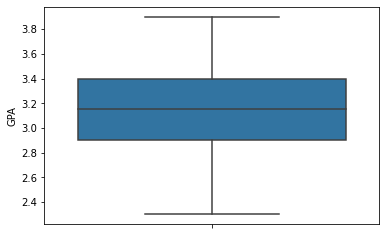

In [183]:
figsize=(20,7)
sns.boxplot(y="GPA", data = df_Survey)

<AxesSubplot:ylabel='Salary'>

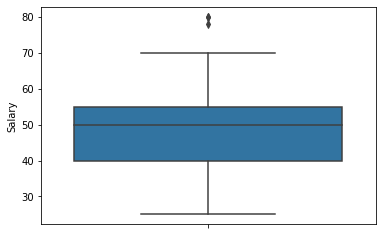

In [185]:
figsize=(20,7)
sns.boxplot(y="Salary", data = df_Survey)

<AxesSubplot:ylabel='Spending'>

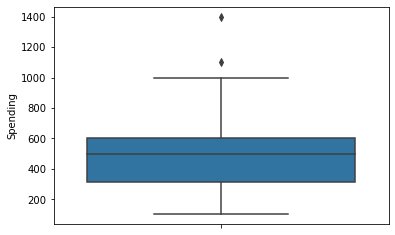

In [187]:
figsize=(20,7)
sns.boxplot(y="Spending", data = df_Survey)

<AxesSubplot:ylabel='Text Messages'>

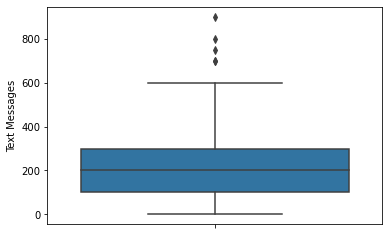

In [189]:
figsize=(20,7)
sns.boxplot(y="Text Messages", data = df_Survey)

In [192]:
df_asphalt = pd.read_csv("A & B shingles-1.csv")


In [196]:
df_asphalt_A = df_asphalt["A"]
df_asphalt_A

0     0.44
1     0.61
2     0.47
3     0.30
4     0.15
5     0.24
6     0.16
7     0.20
8     0.20
9     0.20
10    0.26
11    0.14
12    0.33
13    0.13
14    0.72
15    0.51
16    0.28
17    0.39
18    0.39
19    0.25
20    0.16
21    0.20
22    0.22
23    0.42
24    0.24
25    0.21
26    0.49
27    0.34
28    0.36
29    0.29
30    0.27
31    0.40
32    0.29
33    0.43
34    0.34
35    0.37
Name: A, dtype: float64

In [200]:
df_asphalt_B = df_asphalt["B"].dropna()
df_asphalt_B

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
Name: B, dtype: float64

# step 1 H0: Mu = 0.35
        ## H1: Mu > 0.35

# step 2 alpha = 0.05

# Step 3: Identify the test statistic
We do not know the population standard deviation and n = 36. So we use the t distribution and the tSTAT test statistic.

In [202]:
df_asphalt_A.describe()

count    36.000000
mean      0.316667
std       0.135731
min       0.130000
25%       0.207500
50%       0.290000
75%       0.392500
max       0.720000
Name: A, dtype: float64

In [206]:
t_statistic, p_value = ttest_1samp(df_asphalt_A, 0.316667)
p_value/2

0.4999941634005829

In [208]:
df_asphalt_B.describe()

count    31.000000
mean      0.273548
std       0.137296
min       0.100000
25%       0.160000
50%       0.230000
75%       0.400000
max       0.580000
Name: B, dtype: float64

In [210]:
t_statistic, p_value = ttest_1samp(df_asphalt_B, 0.273548)
p_value/2
# Accept Null Hypothesis

0.4999937894134237

# 3.2


In [212]:
t_statistic, p_value  = ttest_ind(df_asphalt_A,df_asphalt_B)
p_value

0.2017496571835328